In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

UsageError: unrecognized arguments: 


In [2]:
# Create table for missing data analysis
def draw_missing_data_table(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  return missing_data

In [3]:
# Plot validation curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
  train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
  plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
  plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
  plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='r')

  plt.grid()
  plt.xscale('log')
  plt.legend(loc='best')
  plt.xlabel('Parameter')
  plt.ylabel('Score')
  plt.ylim(ylim)


In [4]:
df = pd.read_csv('titanic_passengers.csv')
df_raw = df.copy() # save original dataset


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Dealing with missing data
#### - use only valid data, deleting the cases where data is missing
#### - impute data using values from similar cases or using the mean value
#### - impute data using model-based methods in which models are defined to predict the missing values

In [7]:
# Analyze the missing data
draw_missing_data_table(df)

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [8]:
# Cabin has >25% missing values. Deleting the variable
# Age can be imputed
df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
# Fill missing values in Age with specific value
value = 1000
df['Age'].fillna(1000, inplace=True)
df['Age'].max()

1000.0

In [10]:
# Delete observations without Embarked
df.drop(df[pd.isnull(df['Embarked'])].index, inplace=True) # get index of points where Embarked is null
df[pd.isnull(df['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


### To successfully apply machine learning techniques, we need to start a simple model
#### - Select a performance metric and a target value for this metric. In this case, performance metric will be 'accuracy'
#### - Set up a working e2e pipeline. This should allow to estimate the selected performance metric.
#### - Monitor the system to understand its behaviour, whether its poor performance is related to underfitting, overfitting or defects.
#### - Improve the system by iteration.

In [11]:
# Preparing the data
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [12]:
# We don't need PassengerId for prediction purposes, so we will exclude it
# Sex, Embarked, and Pclass should be categorical. Survival is not categorical because it's the output variable.
# Name and Ticket need to be parsed. For now, ignored.
# SibSp could be grouped with Parch to create a Family. For now, identify if the passenger is travelling alone or with family.


# Drop PassengerId
df.drop('PassengerId', axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
# Define categorical variables
df['Sex'] = pd.Categorical(df['Sex'])
df['Embarked'] = pd.Categorical(df['Embarked'])

In [14]:
# Create family feature
df['Family Size'] = df['SibSp'] + df['Parch']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [15]:
# Drop SibSp and Parch
#df.drop('SibSp', axis=1, inplace=True)
#df.drop('Parch', axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [16]:
# Drop Name and Ticket
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [17]:
# Launching the model

# Transform categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True) # to avoid dummy trap
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


In [18]:
# Create a data set to train data imputation methods
from sklearn.model_selection import train_test_split
X = df[df.loc[:, df.columns != 'Survived'].columns]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=1)

In [19]:
# Debug
print('Inputs: \n', X_train.head())
print('Outputs: \n', y_train.head())

Inputs: 
      Pclass   Age  SibSp  Parch     Fare  Family Size  Sex_male  Embarked_Q  \
771       3  48.0      0      0   7.8542            0         1           0   
208       3  16.0      0      0   7.7500            0         0           1   
683       3  14.0      5      2  46.9000            7         1           0   
3         1  35.0      1      0  53.1000            1         0           0   
677       3  18.0      0      0   9.8417            0         0           0   

     Embarked_S  
771           1  
208           0  
683           1  
3             1  
677           1  
Outputs: 
 771    0
208    1
683    0
3      1
677    1
Name: Survived, dtype: int64


In [20]:
# Fit logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# Model performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

CV accuracy: 0.787 +/- 0.037


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Plot learning curve
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
  plt.figure()
  plt.title(title)

  if ylim is not None:
    plt.ylim(*ylim)
  
  plt.xlabel('Training examples')
  plt.ylabel('Score')
  train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
  plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
  plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation score')

  plt.legend(loc='best')
  return plt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

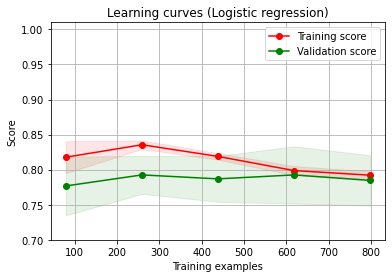

In [23]:
# Assessing model performance
title = 'Learning curves (Logistic regression)'
cv = 10
plot_learning_curve(logreg, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1)

#### Learning curves allow us to diagnose if it's overfitting or underfitting
#### When the model overfits, it means that it performs well on the training set, but not on the validation set.
#### If the model is overfitting, the learning curve will present a gap between the training and validation scores. 
#### Two common solutions for overfitting are reducing the complexity of the model and/or collect more data

#### Underfitting means that the model is not able to perform well in either training or validation sets.
#### When the model underfits, gathering more data is not helpful because the model is already not being able to learn the training data. 
#### The best approaches for these cases are to improve model or to improve the quality of data.

In [24]:
# This model underfits with final score about 0.786

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=C, param_range=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], groups=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. o

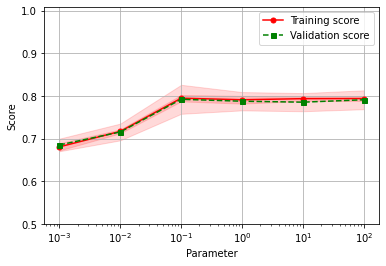

In [25]:
# Plot validation curve
from sklearn.model_selection import validation_curve

title = 'Validation curve (Logistic regression)'
param_name = 'C'
param_range = [0.001,  0.01, 0.1, 1.0, 10.0, 100.0]
cv = 10
plot_validation_curve(estimator=logreg, title=title, X=X_train, y=y_train, param_name=param_name, ylim=(0.5, 1.01), param_range=param_range)

#### Validation curves are a tool that we can use to improve the performance of our model
#### The goal is to see now the model parameter impacts the training and validation scores. 

In [26]:
# At this point model can achieve 0.786 +/- 0.026 accuracy, is based on logic regression and uses Pclass, Age, Fare, FamilySize and Sex as inputs; and Survived as output.

# We can improve the model by iteration:
# - Improving the way we handle Age missing data
# - Exploring the data to understand which features can have impact in the model and how they can be manipulated to boost that impact
# - Building new features that can increase the predictive power of our model

In [114]:
# Trying out the chubby approach

# Restart data set
df = df_raw.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [115]:
# Family size feature
df['Family'] = df['SibSp'] + df['Parch']
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Rev,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr,0


In [116]:
# Drop SibSp and Parch
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,Mr,0


In [117]:
# Drop irrelevant features
df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,1,0,3,male,22.0,7.2500,S,Mr,1
1,2,1,1,female,38.0,71.2833,C,Mrs,1
2,3,1,3,female,26.0,7.9250,S,Miss,0
3,4,1,1,female,35.0,53.1000,S,Mrs,1
4,5,0,3,male,35.0,8.0500,S,Mr,0


In [118]:
# Imputation of Age missing data

# The steps to implement new imputation method are:
# - Extract titles from Name
# - Plot a figure with both features and confirm that there is a connection between titles and age
# - For each title, get people's average age and use it to fill missing values

df_raw['Name'].unique()[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

In [119]:
# The rule is 'last name' + ',' + 'title' + 'other names'

# Extract titles from Name
df['Title'] = 0

for i in df:
  df['Title'] = df_raw['Name'].str.extract('([A-Za-z]+)\.', expand=False)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,1,0,3,male,22.0,7.2500,S,Mr,1
1,2,1,1,female,38.0,71.2833,C,Mrs,1
2,3,1,3,female,26.0,7.9250,S,Miss,0
3,4,1,1,female,35.0,53.1000,S,Mrs,1
4,5,0,3,male,35.0,8.0500,S,Mr,0


In [120]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

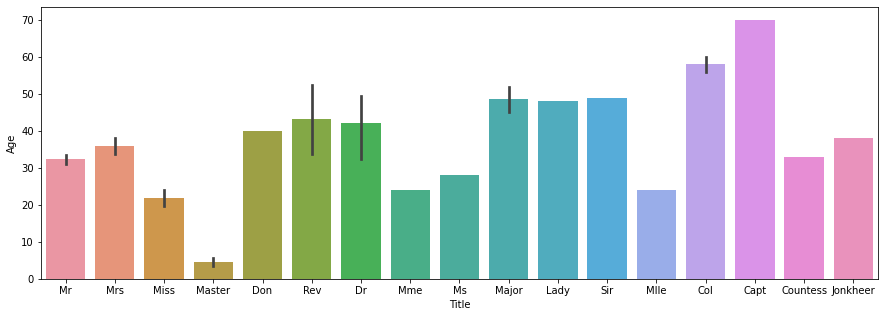

In [121]:
# Plot the bar plot (titles, age and sex)
plt.figure(figsize=(15, 5))
sns.barplot(x=df['Title'], y=df_raw['Age'])

# Bar plot gives us an estimate of central tendency for a numeric variable and an indication of uncertainty arount that estimate.
# Apart from Rev and Dr with larger error bar, mean value seems to accurately represent the data of all the other features. 

In [122]:
# Means per title
df_raw['Title'] = df['Title'] # to simplify data handling
means = df_raw.groupby('Title')['Age'].mean()
means.head()

Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          42.0
Name: Age, dtype: float64

In [123]:
# Transform means into dictionary for future mapping
map_means = means.to_dict()
map_means


{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.773972602739725,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.898148148148145,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [124]:
# Impute ages based on titles
idx_nan_age = df.loc[np.isnan(df['Age'])].index
df.loc[idx_nan_age, 'Age'].loc[idx_nan_age] = df['Title'].loc[idx_nan_age].map(map_means)
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
886,887,0,2,male,27.0,13.00,S,Rev,0
887,888,1,1,female,19.0,30.00,S,Miss,0
888,889,0,3,female,NaN,23.45,S,Miss,3
889,890,1,1,male,26.0,30.00,C,Mr,0
890,891,0,3,male,32.0,7.75,Q,Mr,0


In [125]:
# Identify imputed data
df['Imputed'] = 0
df.at[idx_nan_age, 'Imputed'] = 1
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family,Imputed
886,887,0,2,male,27.0,13.00,S,Rev,0,0
887,888,1,1,female,19.0,30.00,S,Miss,0,0
888,889,0,3,female,NaN,23.45,S,Miss,3,1
889,890,1,1,male,26.0,30.00,C,Mr,0,0
890,891,0,3,male,32.0,7.75,Q,Mr,0,0


In [126]:
# Exploratory data analysis using hypothesis driven approach
# List each of the variables and generate hypothesis about their relationship with the target variable Survived. 
# Then test those hypotesis through a set of exploratory data analysis tools.

# PassengerId - unique identification of each passenger. It's not expected to be relevant for analysis
# Survived - Targed variable. 
# Pclass - Ticket class. First class should have a higher survival rate.
# Name - A form of social tagging, especially with a title. It could lead to different forms of treatment. 
# Sex - Always important. 
# Age - Children are usually evacuated first in a disaster
# SibSp - Number of siblings/spouses. Should be easier to survive if you're with your family. 
# Parch - Number of parents/children. Same as SibSp
# Ticket - Ticket number. Shouldn't be important for prediction purposes.
# Fare - Same logic as Pclass 
# Cabin - Can indicate location of people at time of disaster. Variable is excluded due to high percentage of missing values. 
# Embarked - Shouldn't matter where passenger embarked. 


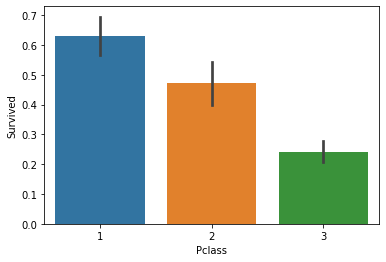

In [127]:
# Pclass
# Hypothesis - higher the class, higher the chance of survival

sns.barplot(df['Pclass'], df['Survived'])
# 60% of people in first class survived. 25% people in third class survived.

In [128]:
# Name/Title
# People's title influences how they're treated
# Before testing the hypothesis, try to group similar titles

# Count how many people have each of the titles
df.groupby(['Title'])['PassengerId'].count()

# Mme and Mlle can be grouped with Mrs and Miss
# All other groups can be grouped into Other

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: PassengerId, dtype: int64

In [129]:
# Map of aggregated titles:
titles_dict = {'Capt': 'Other',
               'Major': 'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr': 'Other',
               'Rev': 'Other',
               'Countess': 'Other',
               'Dona': 'Other',
               'Mme': 'Mrs',
               'Mlle': 'Miss',
               'Ms': 'Miss',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Miss': 'Miss',
               'Master': 'Master',
               'Lady': 'Other'}

In [130]:
# Group titles
df['Title'] = df['Title'].map(titles_dict)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', nan], dtype=object)

In [131]:
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family,Imputed
886,887,0,2,male,27.0,13.00,S,Other,0,0
887,888,1,1,female,19.0,30.00,S,Miss,0,0
888,889,0,3,female,NaN,23.45,S,Miss,3,1
889,890,1,1,male,26.0,30.00,C,Mr,0,0
890,891,0,3,male,32.0,7.75,Q,Mr,0,0


In [132]:
# Transform into categorical
df['Title'] = pd.Categorical(df['Title'])
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex              object
Age             float64
Fare            float64
Embarked         object
Title          category
Family            int64
Imputed           int64
dtype: object

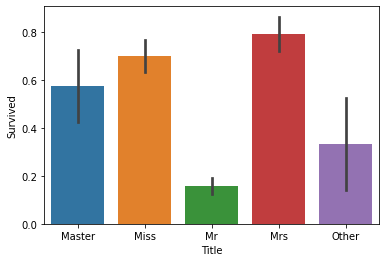

In [133]:
sns.barplot(x='Title', y='Survived', data=df)

# People with Mr survived less than people with other titles
# Survival rate over 50% corresponds to titles Mrs and Children (Master)
# There's a significant uncertainty in Other category which suggests a more detailed analysis to sort this out.
# Same thing is with Master category

In [134]:
# Sex

# Transform into categorical
df['Sex'] = pd.Categorical(df['Sex'])

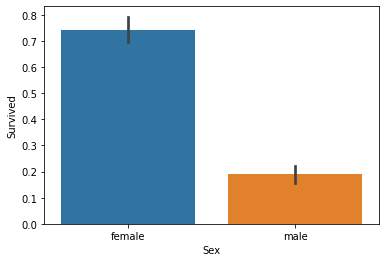

In [135]:
sns.barplot(df['Sex'], df['Survived'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]),
 <a list of 88 Text major ticklabel objects>)

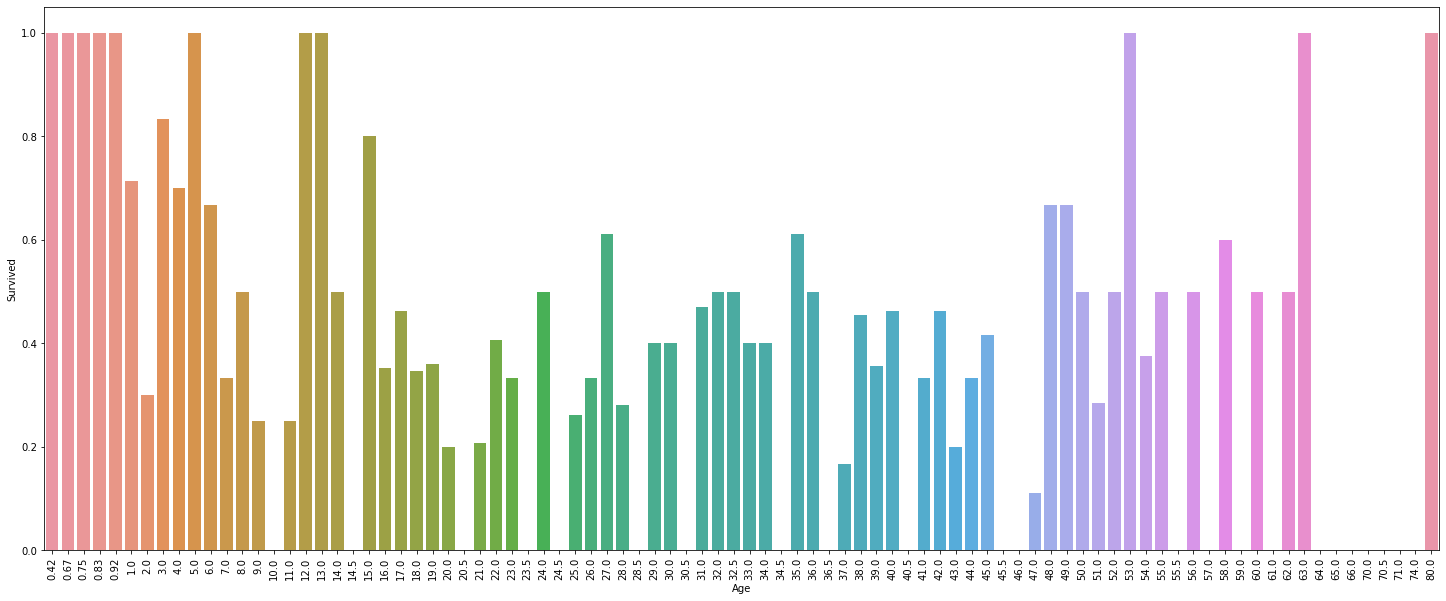

In [136]:
# Age
# Children should be more prone to survive
# Elders might as well depending circumstances

plt.figure(figsize=(25, 10))
sns.barplot(df['Age'], df['Survived'], ci=None)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]),
 <a list of 88 Text major ticklabel objects>)

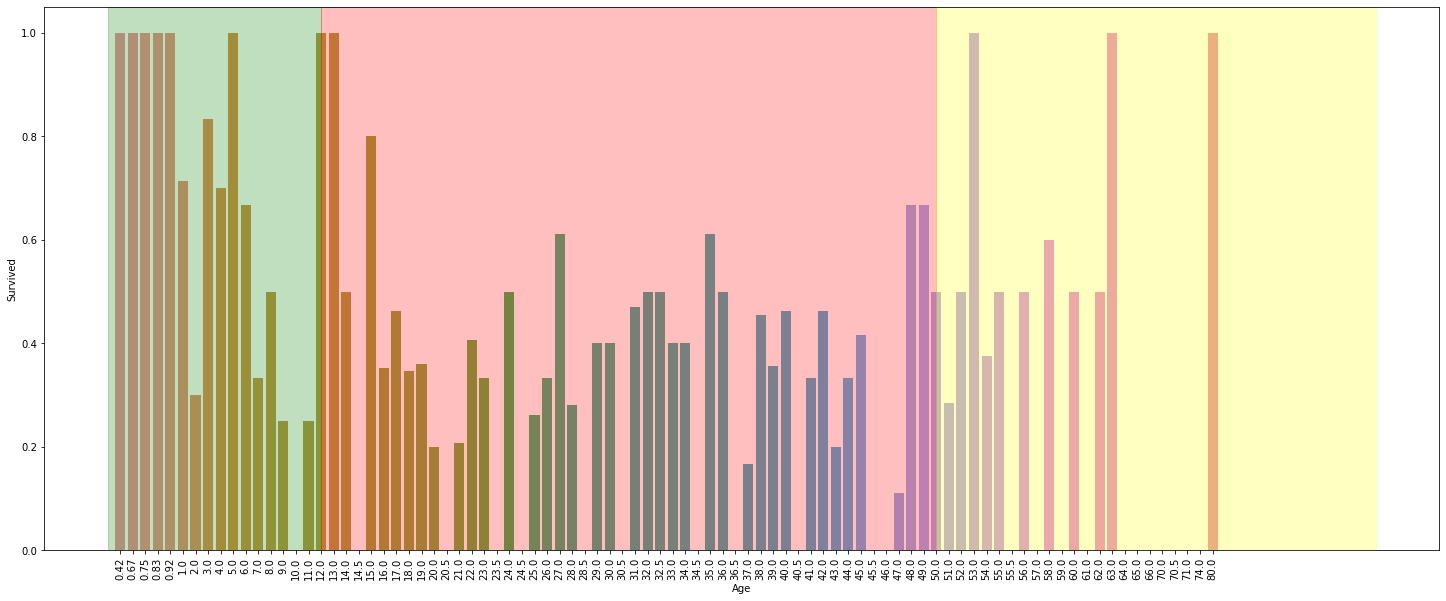

In [137]:
# Plot age regions

limit_1 = 12
limit_2 = 50

x_limit_1 = np.size(df[df['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(df[df['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(25, 10))
sns.barplot(df['Age'], df['Survived'], ci=None)

plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2, 100, alpha=0.25, color='yellow')

plt.xticks(rotation=90)

In [138]:
# Bin data
df['Age'] = pd.cut(df['Age'], bins=[0, 12, 50, 100], labels=['Child', 'Adult', 'Elder'])


In [139]:
df['Age'].tail()

886    Adult
887    Adult
888      NaN
889    Adult
890    Adult
Name: Age, dtype: category
Categories (3, object): [Child < Adult < Elder]

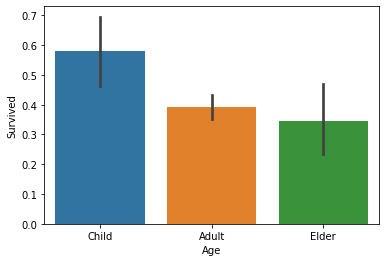

In [140]:
sns.barplot(df['Age'], df['Survived'])
# Children have higher survival rate

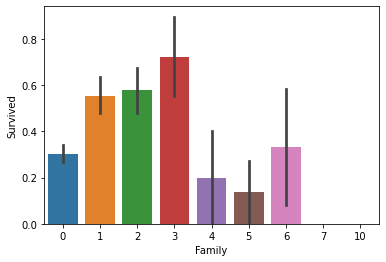

In [143]:
# Family size
# Those who travel alone should have lower survival rate

sns.barplot(df['Family'], df['Survived'])
# Survival rate changes with families over 3 members

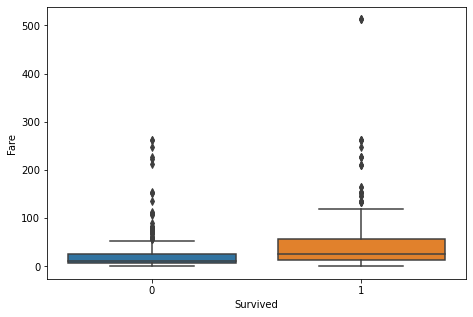

In [144]:
# Fare
# Same as Pclass, higher fare, higher survival rate

plt.figure(figsize=(7.5, 5))
sns.boxplot(df['Survived'], df['Fare'])

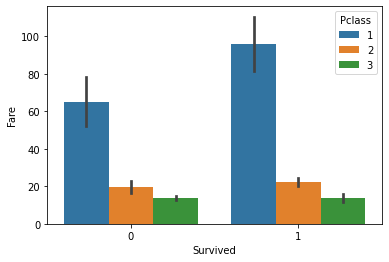

In [145]:
# Checking how connected is Fare to Pclass
sns.barplot(df['Survived'], df['Fare'], df['Pclass'])

# It seems Fare doesn't make difference if you are travelling second or third class. If you are travelling first class, higher fare, higher chance of survival.

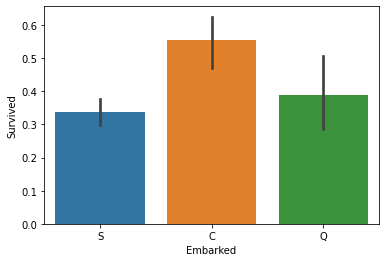

In [146]:
# Embarked
# Shouldn't influence the chance of survival

sns.barplot(df['Embarked'], df['Survived'])

# Looks like embarked in location C have higher change of survival which could be hiding some relationship that is not obvious with this plot

In [147]:
df.groupby(['Embarked']).mean()

# Seems that people embarked on C were paying higher fare and travelling in a better class

,PassengerId,Survived,Pclass,Fare,Family,Imputed
Embarked,,,,,,
C,445.357143,0.553571,1.886905,59.954144,0.750000,0.226190
Q,417.896104,0.389610,2.909091,13.276030,0.597403,0.636364
S,449.527950,0.336957,2.350932,27.079812,0.984472,0.139752


In [148]:
# Relationship with age
df.groupby(['Embarked', 'Age'])['PassengerId'].count()

Embarked  Age  
C         Child     11
          Adult    104
          Elder     15
Q         Child      4
          Adult     21
          Elder      3
S         Child     54
          Adult    455
          Elder     45
Name: PassengerId, dtype: int64

In [149]:
# Relationship with sex
df.groupby(['Embarked', 'Sex'])['PassengerId'].count()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: PassengerId, dtype: int64

In [150]:
# Considering above results, embarkment point doesn't influence survival rate. 
# Survival rate is influenced mostly by class and fare price

### Feature extraction

#### It addresses the problem of attaining the most informative and compact set of features to improve the performance of machine learning models
#### Informative - means we are looking for features that can characterize the behavior of what we are trying to model.
#### Eg. If we want to model weather, features like temperature, humidity and wind are informative while football game will not be informative because it doesn't affect the weather
#### Compact - we want to exclude irrelevant features for our model to reduce overfitting 

In [151]:
# Feature engineering
# Converting raw data into useful features
# Box-Cox transformations
# Polynomials generation through non-linear expansions

# Before applicating these techniques, we're making some adjustments to our data to prepare it for modeling process

df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family,Imputed
0,1,0,3,male,Adult,7.2500,S,Mr,1,0
1,2,1,1,female,Adult,71.2833,C,Mrs,1,0
2,3,1,3,female,Adult,7.9250,S,Miss,0,0
3,4,1,1,female,Adult,53.1000,S,Mrs,1,0
4,5,0,3,male,Adult,8.0500,S,Mr,0,0


In [152]:
# Drop feature
df.drop('PassengerId', axis=1, inplace=True)

In [153]:
df.dtypes

Survived       int64
Pclass         int64
Sex         category
Age         category
Fare         float64
Embarked      object
Title       category
Family         int64
Imputed        int64
dtype: object

In [154]:
# Transform object into categorical
df['Embarked'] = pd.Categorical(df['Embarked'])
df['Pclass'] = pd.Categorical(df['Pclass'])
df.dtypes

Survived       int64
Pclass      category
Sex         category
Age         category
Fare         float64
Embarked    category
Title       category
Family         int64
Imputed        int64
dtype: object

In [155]:
# Transform categorical features into dummy variables
df = pd.get_dummies(df, drop_first=1)
df.head()

,Survived,Fare,Family,Imputed,Pclass_2,Pclass_3,Sex_male,Age_Adult,Age_Elder,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,7.2500,1,0,0,1,1,1,0,0,1,0,1,0,0
1,1,71.2833,1,0,0,0,0,1,0,0,0,0,0,1,0
2,1,7.9250,0,0,0,1,0,1,0,0,1,1,0,0,0
3,1,53.1000,1,0,0,0,0,1,0,0,1,0,0,1,0
4,0,8.0500,0,0,0,1,1,1,0,0,1,0,1,0,0


In [156]:
# Get training and test sets
from sklearn.model_selection import train_test_split
X = df[df.loc[:, df.columns != 'Survived'].columns]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [157]:
# Box-Cox transformations
# Aim is to normalize variables
from scipy.stats import boxcox

X_train_transformed = X_train.copy()
X_train_transformed['Fare'] = boxcox(X_train_transformed['Fare'] +1)[0]
X_test_transformed = X_test.copy()
X_test_transformed['Fare'] = boxcox(X_test_transformed['Fare'] +1)[0]

In [158]:
# Polynomials
# Standard way to enrich set of features by generating polynomials.
# It creates interactions between features as well as create powers(square of a feature).
# Introducing this nonlinear dimension can improve the predictive power of the model

# To scale the features, data will be transformed so that it lies between minimum and maximum value (0 and 1).

In [159]:
# Rescale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_transformed_scaled = scaler.fit_transform(X_train_transformed)
X_test_transformed_scaled = scaler.fit_transform(X_test_transformed)

In [160]:
# Get polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2).fit(X_train_transformed)
X_train_poly = poly.transform(X_train_transformed_scaled)
X_test_poly = poly.transform(X_test_transformed_scaled)

In [161]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x0 x13', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x1 x13', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x3 x13', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x5 x13', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x6 x13', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x7 x13', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x8 x13', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x9 x13', 'x10^2', 'x10 x11', '

In [162]:
# Feature selection
# Using univariate statistics approach
# Selects features based on univariate statistical tests between each feature and the target variable


In [164]:
# Select features using chi-squared test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Get score using original model
logreg = LogisticRegression(C=1)
logreg.fit(X_train, y_train)
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy (original): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

# Get scores using models with feature selection
for i in range(1, X_train_poly.shape[1]+1, 1):
  # select i features
  select = SelectKBest(score_func=chi2, k=i)
  select.fit(X_train_poly, y_train)
  X_train_poly_selected = select.transform(X_train_poly)
  
  # Model with i features selected
  logreg.fit(X_train_poly_selected, y_train)
  scores = cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
  print('CV accuracy (number of features = %i): %.3f +/- %.3f' % (i, np.mean(scores), np.std(scores)))

  # Save results if best score
  if np.mean(scores) > highest_score:
    highest_score = np.mean(scores)
    std = np.std(scores)
    k_features_highest_score = i
  elif np.mean(scores) == highest_score:
    if np.std(scores) < std:
      highest_score = np.mean(scores)
      std = np.std(scores)
      k_features_highest_score = i
  
  # Print the number of features
print('Number of features when highest score: %i' % k_features_highest_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

CV accuracy (original): 0.825 +/- 0.031
CV accuracy (number of features = 1): 0.789 +/- 0.046
CV accuracy (number of features = 2): 0.789 +/- 0.046
CV accuracy (number of features = 3): 0.789 +/- 0.046
CV accuracy (number of features = 4): 0.789 +/- 0.046
CV accuracy (number of features = 5): 0.789 +/- 0.046
CV accuracy (number of features = 6): 0.789 +/- 0.046
CV accuracy (number of features = 7): 0.785 +/- 0.042
CV accuracy (number of features = 8): 0.785 +/- 0.042
CV accuracy (number of features = 9): 0.785 +/- 0.042
CV accuracy (number of features = 10): 0.798 +/- 0.038
CV accuracy (number of features = 11): 0.798 +/- 0.038
CV accuracy (number of features = 12): 0.798 +/- 0.038
CV accuracy (number of features = 13): 0.798 +/- 0.038
CV accuracy (number of features = 14): 0.798 +/- 0.038
CV accuracy (number of features = 15): 0.798 +/- 0.038
CV accuracy (number of features = 16): 0.796 +/- 0.036
CV accuracy (number of features = 17): 0.796 +/- 0.036
CV accuracy (number of features = 

In [165]:
# Unicorn model

# Fit model for best feature combination

In [166]:
# Select features
select = SelectKBest(score_func=chi2, k=k_features_highest_score)
select.fit(X_train_poly, y_train)
X_train_poly_selected = select.transform(X_train_poly)

In [167]:
# Fit model
logreg = LogisticRegression(C=1)
logreg.fit(X_train_poly_selected, y_train)

LogisticRegression(C=1)

In [168]:
# Model performance
scores = cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.829 +/- 0.035


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

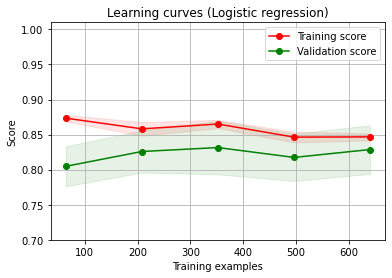

In [169]:
# Learning curve
title = 'Learning curves (Logistic regression)'
cv = 10
plot_learning_curve(logreg, title, X_train_poly_selected, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1)

# No signs of overfitting or underfitting

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=C, param_range=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0], groups=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. o

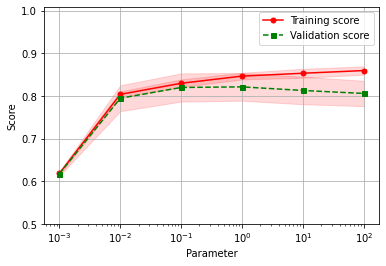

In [170]:
# Validation curve
title = 'Validation curve (Logistic regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
cv = 10
plot_validation_curve(estimator=logreg, title=title, X=X_train_poly_selected, y=y_train, param_name=param_name, ylim=(0.5, 1.01), param_range=param_range)

In [171]:
# We used C=1 which is on the edge of overfitting. No signs of underfitting since the model performs well.

In [178]:
df = pd.read_csv('titanic_passengers.csv')
df_raw = df.copy()

In [179]:
# Transform data set (based on Chapter 2)

## 2.2
df['FamilySize'] = df['SibSp'] + df['Parch']
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

df['Title']=0
for i in df:
    df['Title']=df_raw['Name'].str.extract('([A-Za-z]+)\.', expand=False)  
df_raw['Title'] = df['Title']  
means = df_raw.groupby('Title')['Age'].mean()
map_means = means.to_dict()
idx_nan_age = df.loc[np.isnan(df['Age'])].index
df.loc[idx_nan_age, 'Age'] = df['Title'].loc[idx_nan_age].map(map_means)
df['Title'] = df['Title'].map(titles_dict)
df['Title'] = pd.Categorical(df['Title'])

df['Imputed'] = 0
df.at[idx_nan_age.values, 'Imputed'] = 1

df['Age'] = pd.cut(df['Age'], bins=[0, 12, 50, 200], labels=['Child','Adult','Elder'])

## 2.3
passenger_id = df['PassengerId'].values
df.drop('PassengerId', axis=1, inplace=True)
df['Embarked'] = pd.Categorical(df['Embarked'])
df['Pclass'] = pd.Categorical(df['Pclass'])
df = pd.get_dummies(df, drop_first=1)

df = df.fillna(df.mean())  # There is one missing value in 'Fare'

X = df[df.loc[:, df.columns != 'Survived'].columns]

X_transformed = X.copy()
X_transformed['Fare'] = boxcox(X_transformed['Fare'] + 1)[0]

scaler = MinMaxScaler()
X_transformed_scaled = scaler.fit_transform(X_transformed)

poly = PolynomialFeatures(degree=2).fit(X_transformed)
X_poly = poly.transform(X_transformed_scaled)

X_poly_selected = select.transform(X_poly)

In [180]:
# Submit predictions

predictions = logreg.predict(X_poly_selected)
submission = pd.DataFrame({'PassengerId': passenger_id, 'Survived': predictions})

In [181]:
submission.to_csv('submission.csv', index=False)